<a href="https://colab.research.google.com/github/rudrani02/project2/blob/main/onlinefood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.9 MB/s eta 0:00:00


In [ ]:
!pip install colorama

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 9.1 MB/s eta 0:00:00


In [ ]:
# Import Basis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from colorama import Fore, Style, init;
# Import necessary libraries
from IPython.display import display, HTML
from scipy.stats import skew  # Import the skew function
# Import Plotly.go
import plotly.graph_objects as go
# import Subplots
from plotly.subplots import make_subplots
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
# Model Train
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler , StandardScaler , QuantileTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
# Classifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
# Optuna
import optuna
# Paellete
# palette = ["#00B1D2FF", "#FDDB27FF"]
# palette = ['#D7A9E3FF', '#8BBEE8FF', '#A8D5BAFF']
palette = ["#00203FFF", "#ADEFD1FF"]

color_palette = sns.color_palette(palette)
# Remove Warnings
import warnings
warnings.filterwarnings("ignore")
# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [14]:
tr_d = pd.read_csv('/content/creditcard_2023.csv')

In [15]:
tr_d.drop('id',axis = 1 , inplace = True)

In [29]:
# Text Color
def PrintColor(text: str, color=Fore.CYAN, style=Style.BRIGHT):
    "Prints color outputs using colorama using a text F-string"
    print(style + color + text + Style.RESET_ALL)

# Text For Main Heading
def print_blue_large(text):
    PrintColor(text, Fore.BLUE + Style.BRIGHT)

# Main Heading
def print_boxed_blue_heading(text):
    length = len(text) + 4
    print(f"\n{Style.BRIGHT}{Fore.BLUE}{'='*length}{Style.RESET_ALL}")
    print(f"{Style.BRIGHT}{Fore.BLUE}| {text} |{Style.RESET_ALL}")
    print(f"{Style.BRIGHT}{Fore.BLUE}{'='*length}{Style.RESET_ALL}")

# Function to Overview Data
def data_overview(tr_d):

    # Display head of the training dataset nicely
    print_boxed_blue_heading("The Head Of Train Dataset is:")
    display(HTML(tr_d.head(5).to_html(index=False).replace('<table border="1" class="dataframe">', '<table style="border: 2px solid blue;">')))

    print('\n')

    # Shapes of Train and Test
    print_boxed_blue_heading("Shape Information:")
    PrintColor(f"The Shape Of Train Data is {tr_d.shape} || No of Rows is : {tr_d.shape[0]} and Columns is {tr_d.shape[1]}", Fore.CYAN)
    print('\n')

    # Info of Both Datasets
    print_boxed_blue_heading("Dataset Information:")
    PrintColor(f"\nThe Info Of Train Dataset", Fore.CYAN)
    tr_d.info()

    # Describe Both
    print_boxed_blue_heading("Numerical Summary:")
    PrintColor(f"\nThe Numerical Summary of Train is", Fore.CYAN)
    display(tr_d.describe().style.set_caption("Train Data Summary").set_table_styles([{'selector': 'caption', 'props': [('color', 'blue')]}]))

    # Null Values in Train and Test
    print_boxed_blue_heading("Null Values:")
    PrintColor("\nNull Values in Train", Fore.CYAN)
    print(tr_d.isnull().sum())
    print('\n')

    # Duplicates Values in Train and Test
    print_boxed_blue_heading("Duplicate Values:")
    PrintColor("\nDuplicates Values in Train", Fore.CYAN)
    print(tr_d.duplicated().sum())

In [30]:
# Data Overview
data_overview(tr_d)


| The Head Of Train Dataset is: |


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0





| Shape Information: |
The Shape Of Train Data is (14720, 30) || No of Rows is : 14720 and Columns is 30



| Dataset Information: |

The Info Of Train Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14720 entries, 0 to 14719
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      14720 non-null  float64
 1   V2      14720 non-null  float64
 2   V3      14719 non-null  float64
 3   V4      14719 non-null  float64
 4   V5      14719 non-null  float64
 5   V6      14719 non-null  float64
 6   V7      14719 non-null  float64
 7   V8      14719 non-null  float64
 8   V9      14719 non-null  float64
 9   V10     14719 non-null  float64
 10  V11     14719 non-null  float64
 11  V12     14719 non-null  float64
 12  V13     14719 non-null  float64
 13  V14     14719 non-null  float64
 14  V15     14719 non-null  float64
 15  V16     14719 non-null  float64
 16  V17     14719 non-null  float64
 17  V18     14719 non-nu

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,14720.000000,14720.000000,14719.000000,14719.000000,14719.000000,14719.000000,14719.000000,14719.000000,14719.000000,14719.000000,14719.000000,14719.000000,14719.000000,14719.000000,14719.000000,14719.000000,14719.000000,14719.000000,14719.000000,14719.000000,14719.000000,14719.000000,14719.000000,14719.000000,14719.000000,14719.000000,14719.000000,14719.000000,14719.000000,14719.000000
mean,0.311702,-0.384393,1.145522,-0.600589,0.279354,0.507549,0.428383,-0.146369,1.249564,0.547678,-0.262703,0.120848,1.060004,1.414190,-0.146690,0.552223,0.637858,0.400570,-0.320451,-0.149177,-0.137110,-0.168341,-0.049417,0.146970,0.122709,-0.011795,-0.197114,-0.092806,11916.330001,0.004144
std,0.619078,0.526462,0.740189,0.675556,0.665279,0.724546,0.472269,0.257559,0.953033,0.663102,0.570790,0.619349,1.182309,0.787830,1.026012,0.543383,0.416974,0.565014,0.724012,0.604013,0.315566,0.552991,0.493998,1.091142,0.698608,1.222786,0.463312,0.612979,6939.520265,0.064245
min,-2.513872,-20.936274,-2.206922,-4.468314,-4.298320,-18.642598,-3.038728,-4.074350,-2.170915,-2.041556,-3.200405,-1.964099,-3.434314,-2.107417,-3.609738,-2.017711,-1.975492,-2.153325,-5.214795,-16.789033,-5.775451,-6.262872,-14.452018,-3.674306,-6.810179,-3.733169,-5.273815,-8.923980,50.410000,0.000000
25%,-0.153074,-0.545148,0.685323,-0.950964,0.006071,0.102985,0.244499,-0.193202,0.629299,0.314324,-0.578745,-0.285452,0.233324,0.825779,-0.812700,0.192395,0.416787,0.054961,-0.727303,-0.330436,-0.213894,-0.533005,-0.196822,-0.576316,-0.305257,-0.888494,-0.322741,-0.134539,5901.330000,0.000000
50%,0.066282,-0.360638,1.051631,-0.524016,0.182436,0.389709,0.398044,-0.148543,1.137415,0.451509,-0.198959,-0.124575,1.151779,1.476561,-0.085404,0.486764,0.583400,0.347857,-0.291940,-0.201089,-0.155974,-0.155854,-0.069110,0.153116,0.172582,-0.062034,-0.238078,-0.059757,11767.690000,0.000000
75%,0.960878,-0.163303,1.568781,-0.148818,0.399197,0.757131,0.589820,-0.091458,1.694350,0.658326,0.148968,0.455162,1.939779,1.906646,0.539494,0.845344,0.783934,0.678525,0.146186,-0.020532,-0.094557,0.170806,0.048145,0.833288,0.568393,0.809329,-0.122683,0.078288,17966.030000,0.000000
max,1.695400,2.197883,4.440555,2.360359,41.540257,9.295606,37.922674,3.175050,12.171681,12.954246,2.513573,6.109411,4.554510,12.136127,5.078341,6.971189,6.994124,5.510509,3.143020,6.855674,6.834415,4.929620,18.418155,8.395836,10.424231,5.623285,17.987212,11.375357,24035.200000,1.000000



| Null Values: |

Null Values in Train
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64



| Duplicate Values: |

Duplicates Values in Train
0


In [23]:
# Drop Duplicates
tr_d.drop_duplicates(inplace=True)

In [41]:
def single_plot_distribution(column_name, dataframe):
    # Get the value counts of the specified column
    value_counts = dataframe[column_name].value_counts()

    # Set up the figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1]})

    # Donut pie chart
    pie_colors = palette[0:3]
    ax1.pie(value_counts, autopct='%0.001f%%', startangle=90, pctdistance=0.85, colors=pie_colors, labels=None)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax1.add_artist(centre_circle)
    ax1.set_title(f'Distribution of {column_name}', fontsize=16)

    # Bar chart
    bar_colors = palette[0:3]
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax2, palette=bar_colors,)
    ax2.set_title(f'Count of {column_name}', fontsize=16)
    ax2.set_xlabel(column_name, fontsize=14)
    ax2.set_ylabel('Count', fontsize=14)

    # Rotate x-axis labels for better readability
    ax2.tick_params(axis='x', rotation=45)

    # Show the plots
    plt.tight_layout()
    plt.show()


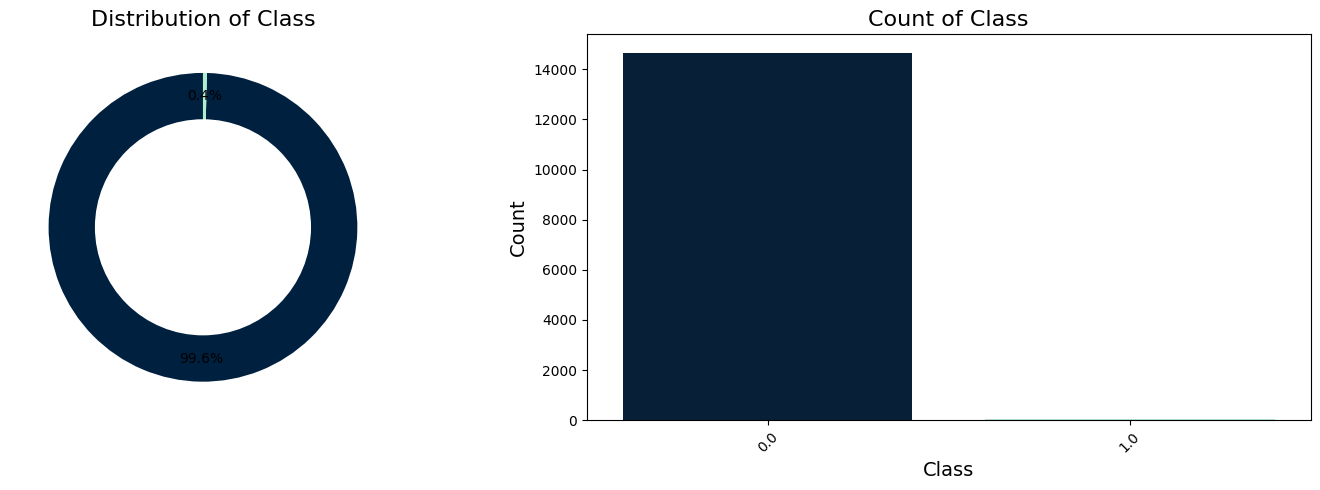

In [42]:
# Class Ditribution
single_plot_distribution('Class',tr_d)

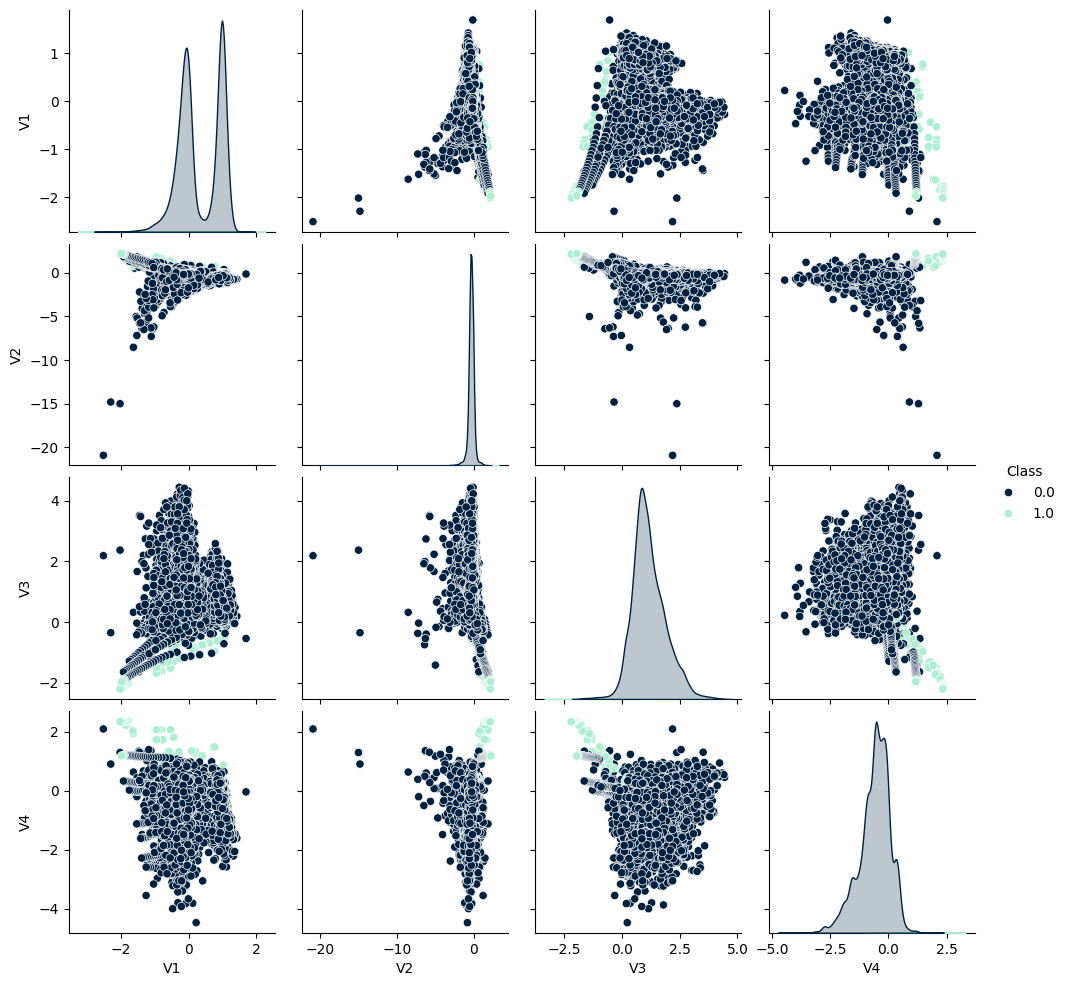

In [43]:
# Cols to Plot
columns_to_plot =['V1', 'V2', 'V3', 'V4','Class']

# Data Columns
data_to_plot = tr_d[columns_to_plot]

# Create a dictionary to map colors to unique values of the 'Quality' column
Q_colors = { 0 : palette[0], 1 : palette[1], 'other': 'gray'}

# Creating the pairplot with the specified palette for categorical variables
sns.pairplot(data_to_plot, hue='Class', palette=Q_colors)
plt.show()

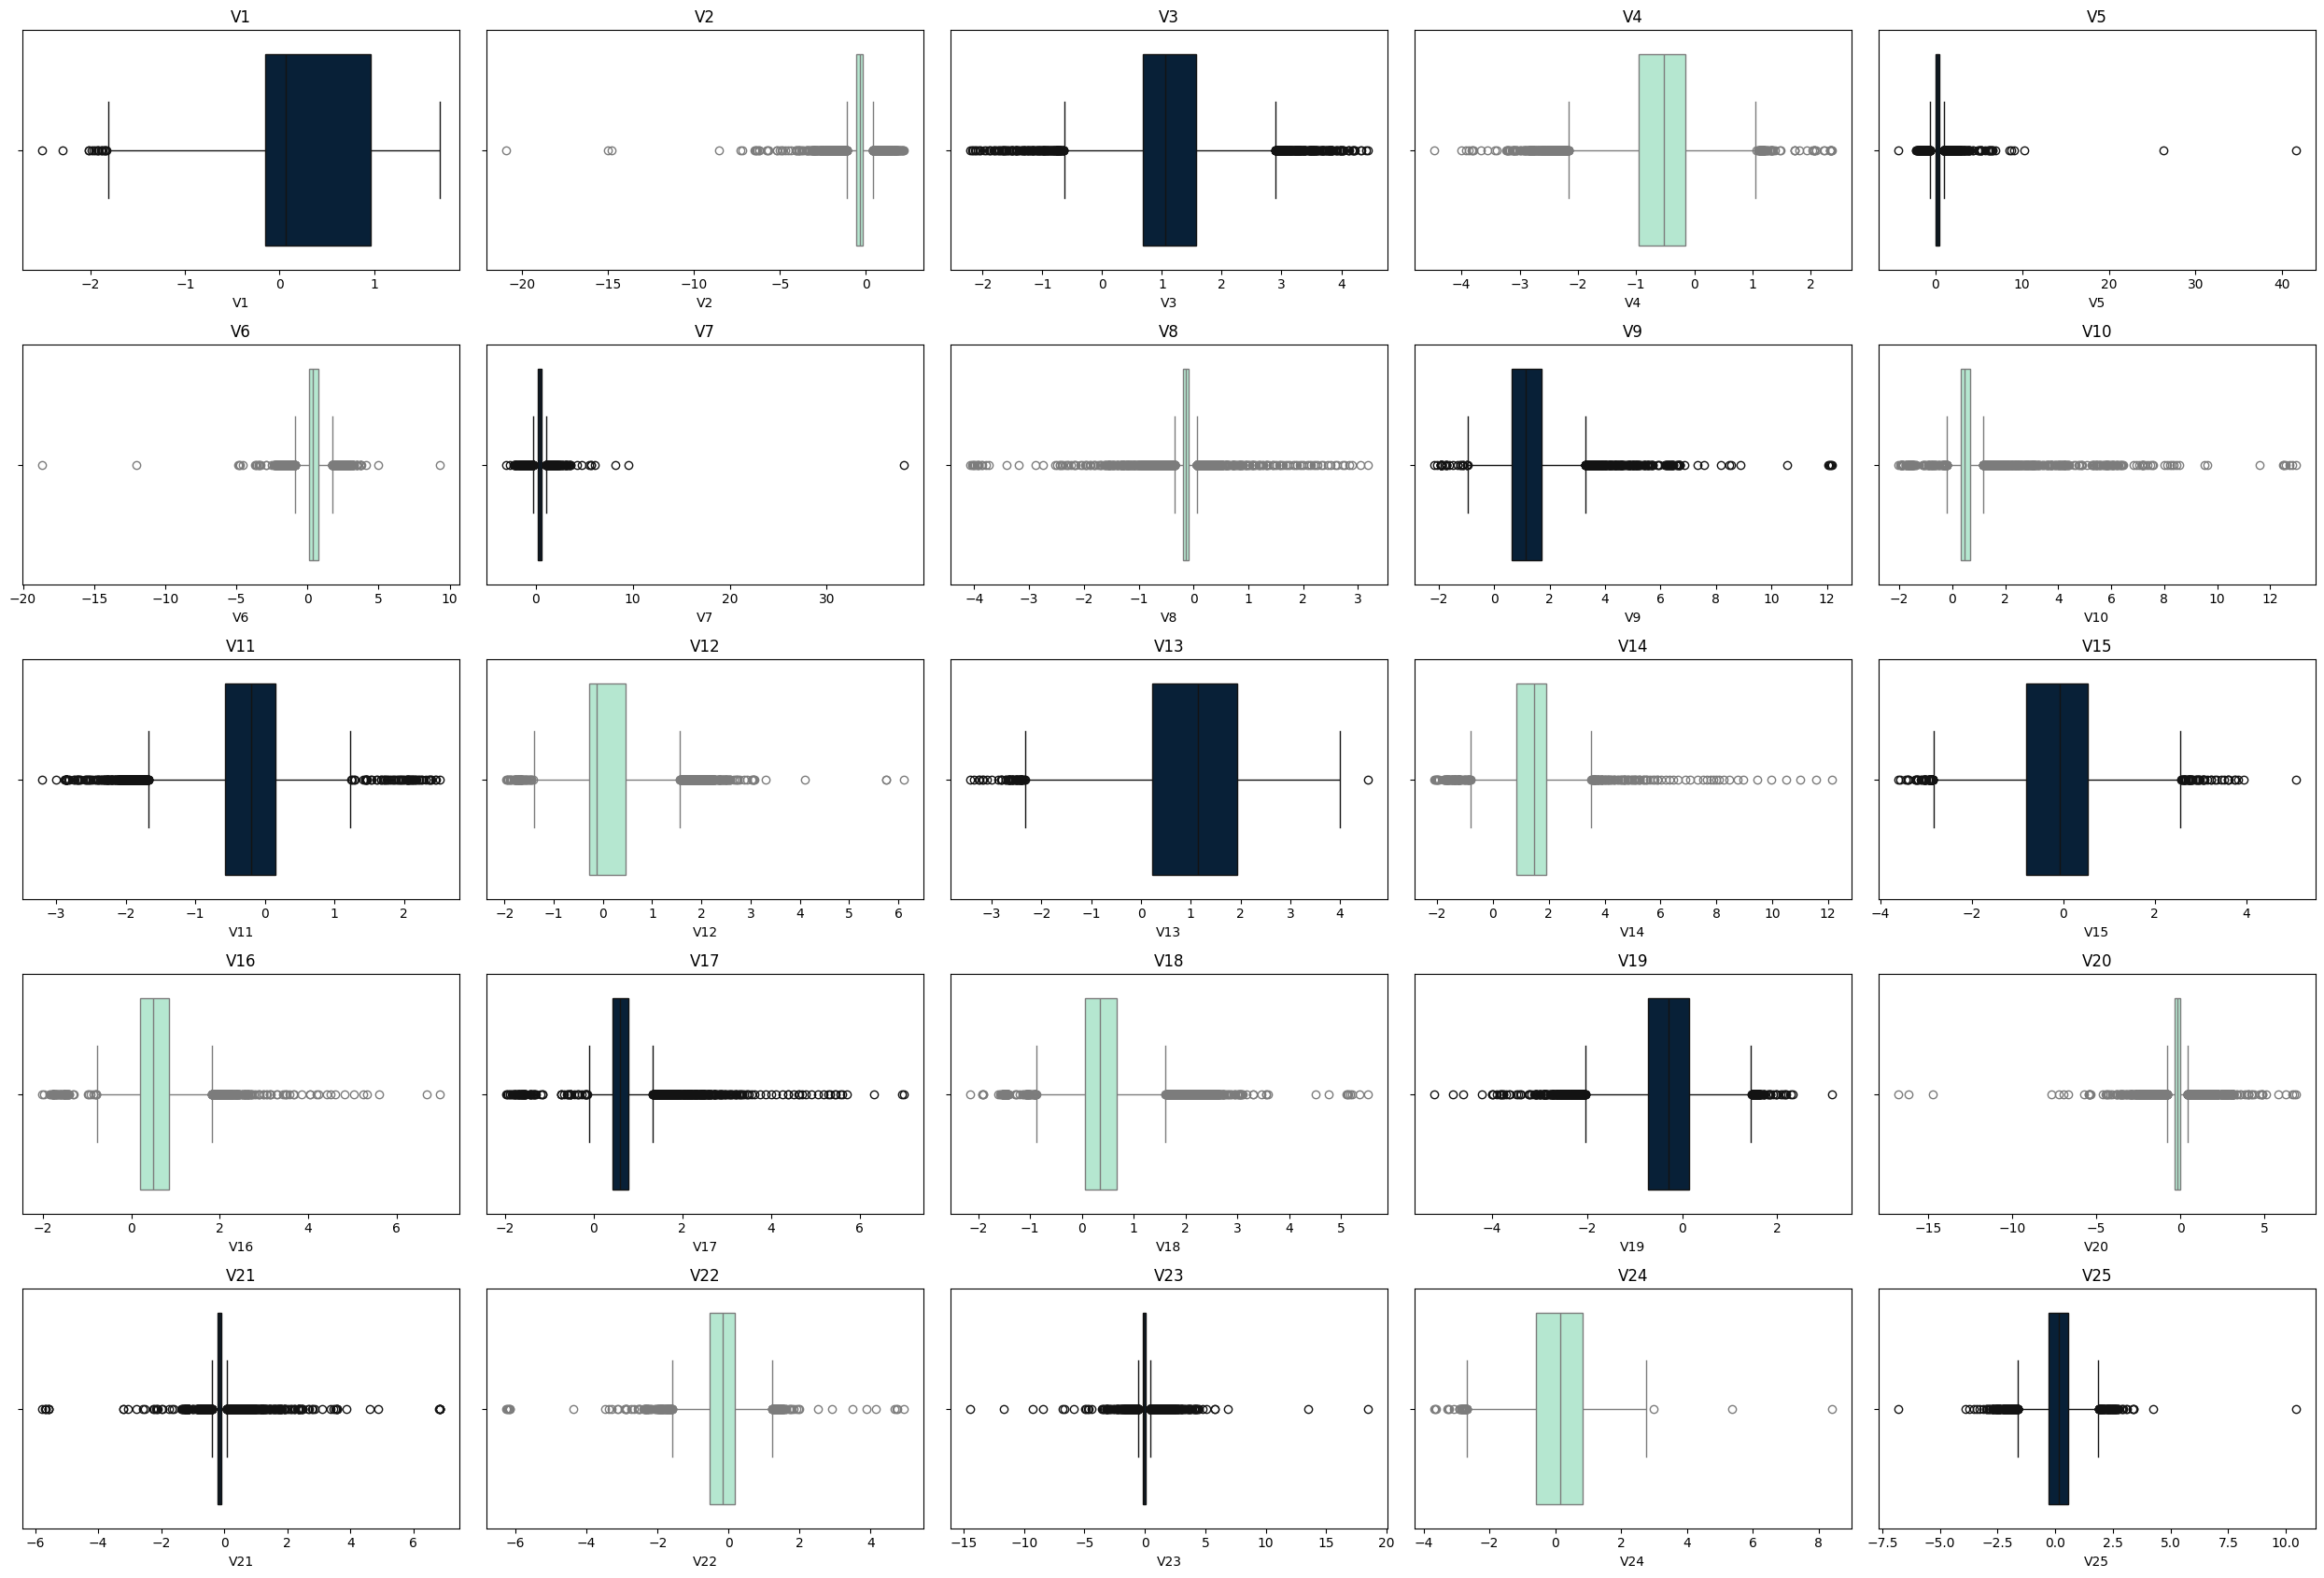

In [44]:
# Num _COLS
NUM_COLS_F =[col for col in tr_d.columns if tr_d[col].dtype == 'float']

# Define the number of rows and columns for subplots
num_rows = 5  # 4 rows
num_cols = 5  # 4 columns

# Create subplots with appropriate titles
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 17))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numerical column and create a box plot
for i, col in enumerate(NUM_COLS_F[:num_rows * num_cols]):
    sns.boxplot(x=tr_d[col], ax=axes[i], color=palette[i % len(palette)])
    axes[i].set_title(col)

# Hide empty subplots
for i in range(len(NUM_COLS_F), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [45]:
# Function to Plot Numerical Distribution
def plot_numerical_distribution_with_hue(data, num_cols, hue_col='Gender', figsize=(25, 25), dpi=100):
    # Create subplots
    rows = (len(num_cols) + 1) // 2
    fig, ax = plt.subplots(rows, 2, figsize=figsize, dpi=dpi)
    ax = ax.flatten()
        # Loop through each column and plot the distribution with hue
    for i, column in enumerate(num_cols):
        sns.histplot(data=data, x=column, hue=hue_col, ax=ax[i], kde=True, palette=palette)
        ax[i].set_title(f'{column} Distribution', size=14)
        ax[i].set_xlabel(None)
        ax[i].set_ylabel(None)

        # Calculate skewness
        skewness = skew(data[column].dropna())
        skew_label = f'Skewness: {skewness:.2f}'

        # Add skewness annotation
        ax[i].annotate(skew_label, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='red')

    # Remove any extra subplots
    for j in range(len(num_cols), len(ax)):
        fig.delaxes(ax[j])

    # Set Tight Layout
    plt.tight_layout()

    # Show the plot
    plt.show()

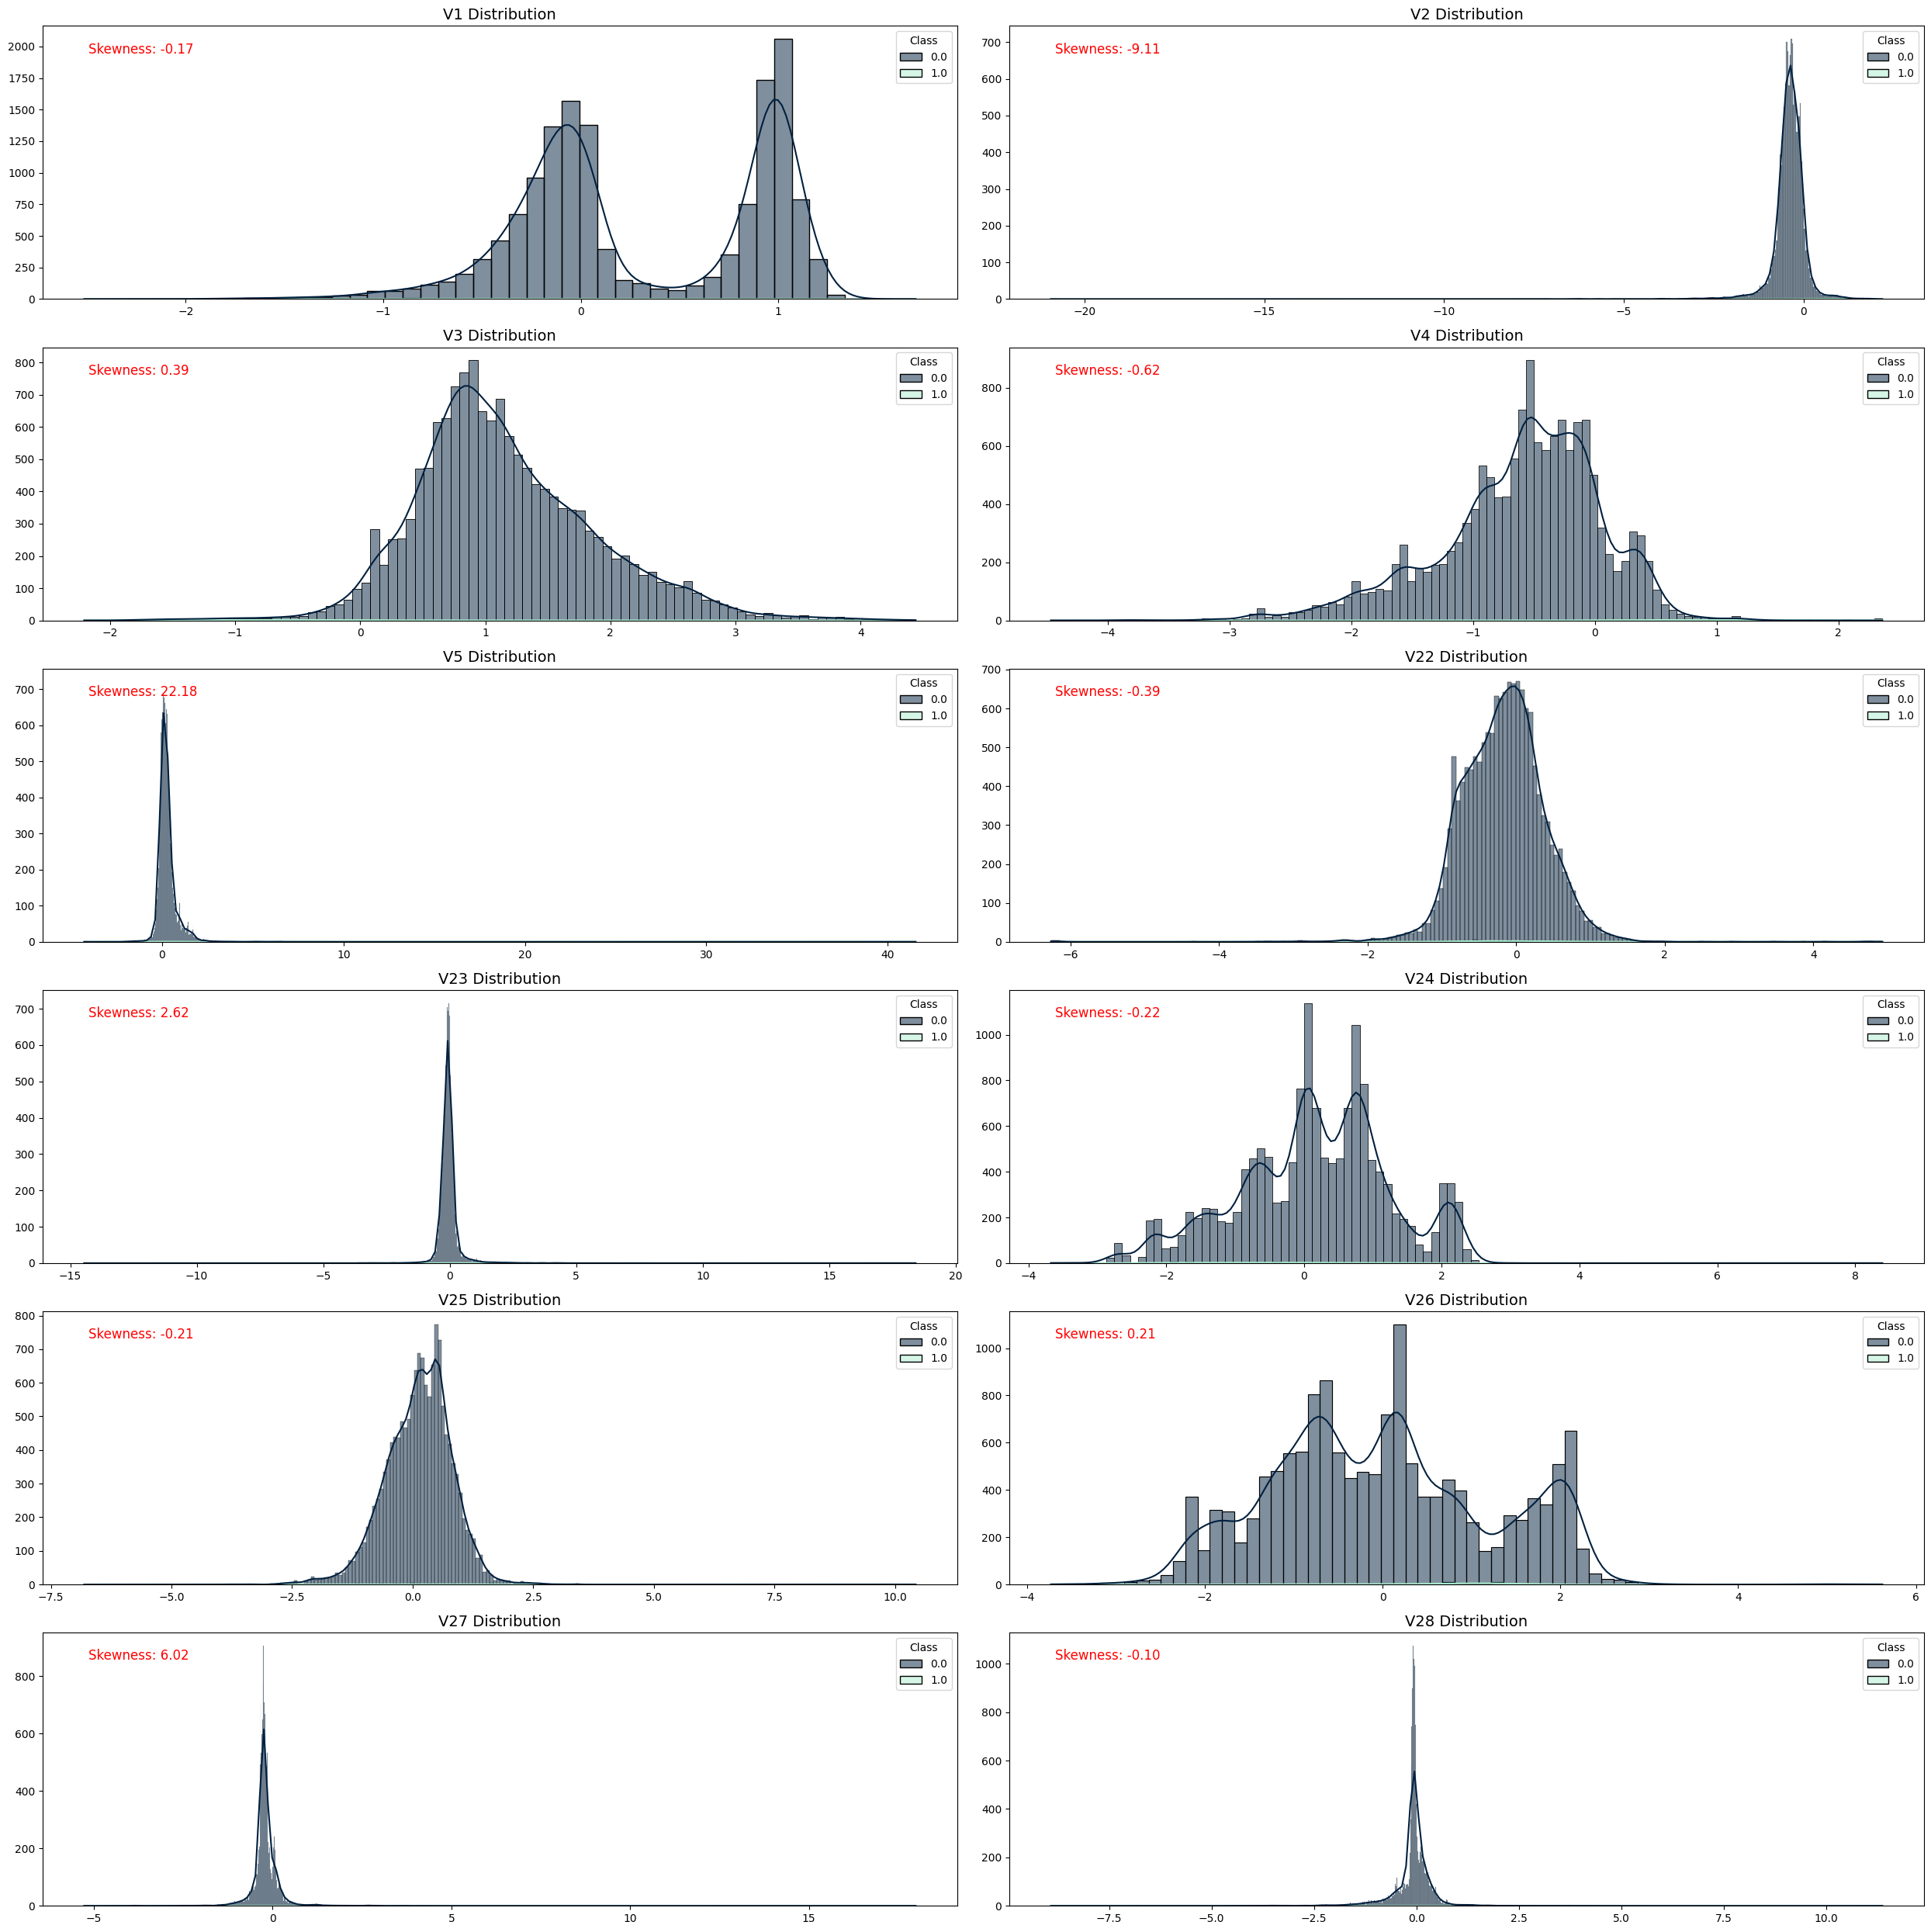

In [46]:
# Cols to Plot
NUM_COLS_F = ['V1','V2','V3','V4','V5','V22','V23','V24','V25','V26','V27','V28']
# Numerical Distribution of Age Vs Fare
plot_numerical_distribution_with_hue(tr_d,NUM_COLS_F,'Class')

In [47]:
# Function to Scale Data
def apply_scaling(data, columns, scaler_type):
    # Check the type of scaler and initialize the appropriate scaler object
    if scaler_type == 'S':
        scaler = StandardScaler()  # Initialize StandardScaler
    elif scaler_type == 'M':
        scaler = MinMaxScaler()  # Initialize MinMaxScaler
    elif scaler_type == 'Q':
        scaler = QuantileTransformer(output_distribution='normal')  # Initialize QuantileTransformer
    else:
        raise ValueError("Invalid scaler type. Choose 'S' for StandardScaler, 'M' for MinMaxScaler, or 'Q' for QuantileTransformer.")

    # Create a copy of the input data to avoid modifying the original data
    scaled_data = data.copy()

    # Loop through each column to be scaled
    for col in columns:
        # Apply the scaler to the current column and update the data with the scaled values
        scaled_data[col] = scaler.fit_transform(scaled_data[[col]])

    # Return the scaled data
    return scaled_data

In [48]:
# Specify columns and scaler type
columns_to_scale =[col for col in tr_d.columns if tr_d[col].dtype == 'float']
scaler_type = 'M'

# Apply scaling to training data
tr_d = apply_scaling(tr_d, columns_to_scale, scaler_type)
PrintColor('Data Scaled Done')

Data Scaled Done


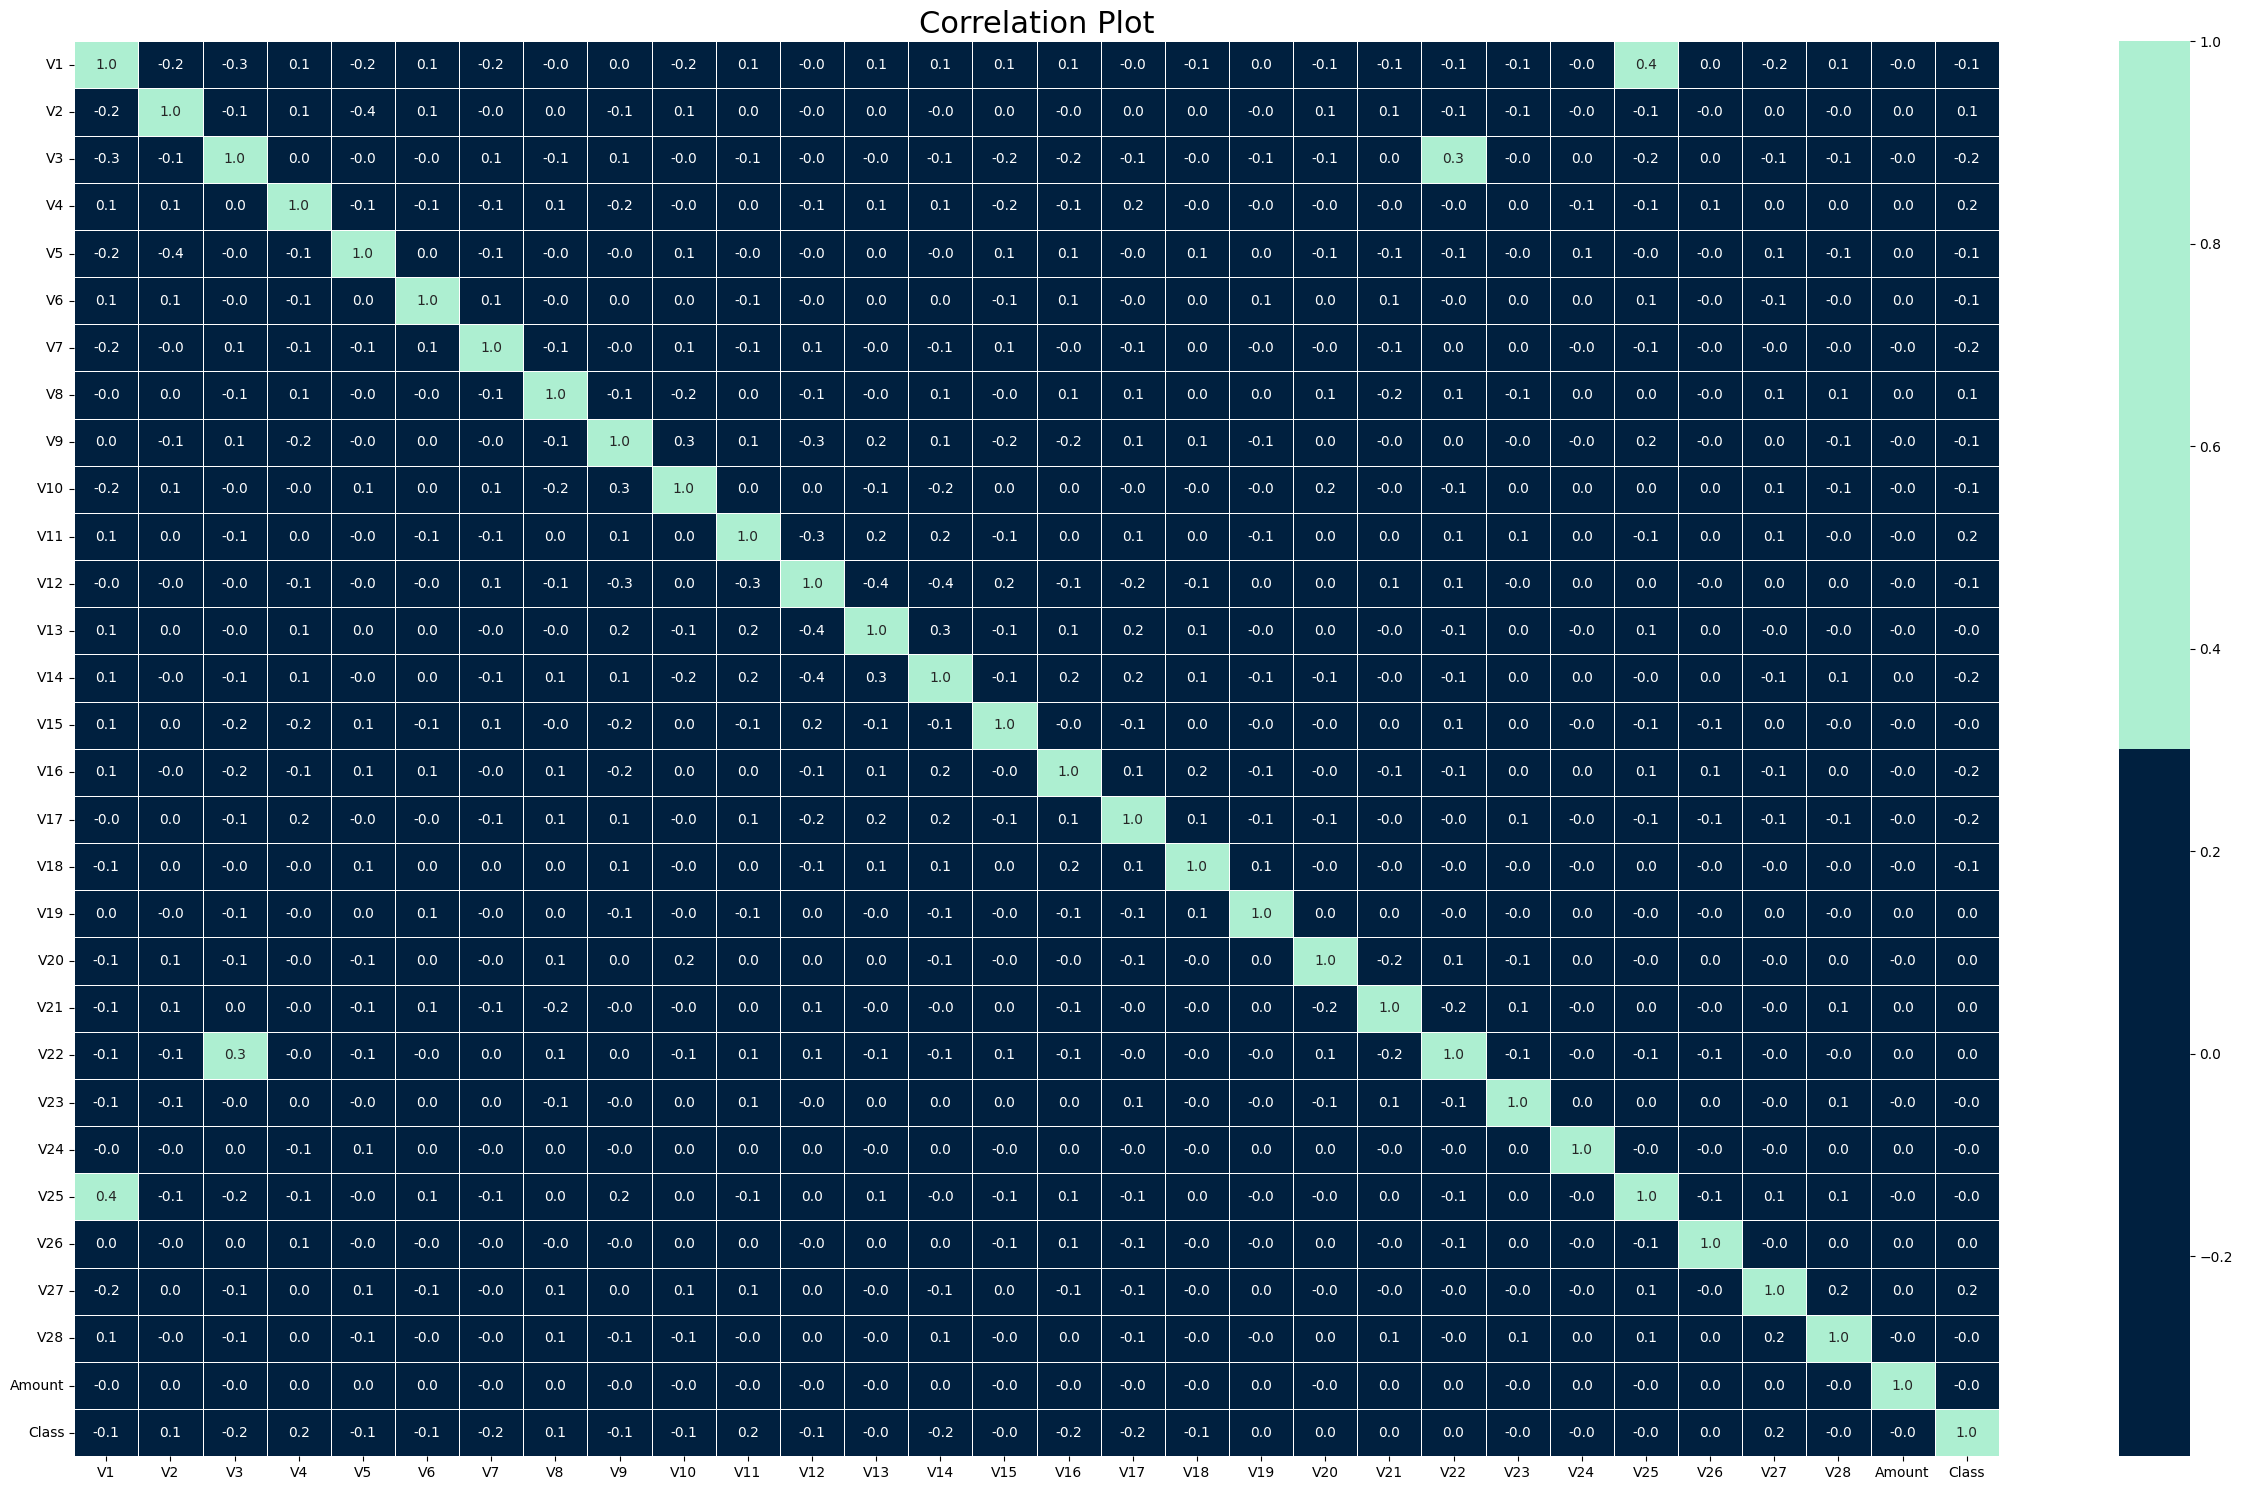

In [49]:
# Select only numeric columns
N_d = tr_d.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = N_d.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap=palette, fmt=".1f", linewidths=0.5)
plt.title('Correlation Plot', fontsize=22)
plt.tight_layout()
plt.show()

In [50]:
# # # =================================================================================================================
# # #                         X < y
# # #==================================================================================================================
X_T = tr_d.drop('Class', axis=1)
y_T = tr_d['Class']
# # # =================================================================================================================
# # #                         Train < Test Split
# # #==================================================================================================================
X_TR, X_TE, Y_TR, Y_TE = train_test_split(X_T, y_T, test_size=0.1, random_state=42)

# # # =================================================================================================================
# # #                         Shapes <
# # #==================================================================================================================
PrintColor(f"Training set shape - X: {X_TR.shape}, y: {Y_TR.shape}")
PrintColor(f"Testing set shape - X: {X_TE.shape}, y: {Y_TE.shape}")

Training set shape - X: (13248, 29), y: (13248,)
Testing set shape - X: (1472, 29), y: (1472,)


In [51]:
# Initlize Models
# XGB Classifier
xgb = XGBClassifier(n_estimators=100, random_state=42)
# CatBoost Classifier
catboost = CatBoostClassifier(iterations=100, random_state=42 , verbose = 0)
# LightGBM Classifier
lgb_params = {
 'n_estimators': 890,
 'learning_rate': 0.7019434172842792,
 'max_depth': 19,
 'reg_alpha': 1.2057738033316066,
 'reg_lambda': 0.18598174484559382,
 'num_leaves': 3,
 'subsample': 0.746154395882518,
 'colsample_bytree': 0.3877680559022922
}
lgbm = LGBMClassifier(**lgb_params, random_state=42 , verbose = -1)
#___________________________________________________________________
print_boxed_blue_heading('Hurry ! Base Clfs Are Intilized')


| Hurry ! Base Clfs Are Intilized |


In [52]:
# Fitting Each Model One by One
# 1. XGB Classifier
xgb.fit(X_TR ,Y_TR)
# Pred
xgb_pred = xgb.predict(X_TE)
#-----------------------------
# 2. CatBoost Classifier
catboost.fit(X_TR, Y_TR)
# Pred
catboost_pred = catboost.predict(X_TE)
#-----------------------------
# 3. LightGBM Classifier
lgbm.fit(X_TR, Y_TR)
# Pred
lgbm_pred = lgbm.predict(X_TE)
#-----------------------------
print_boxed_blue_heading('Hurry ! Model Are Fitted')


| Hurry ! Model Are Fitted |


In [53]:
# Evalate Results
def evaluate(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    return accuracy, precision, confusion

In [57]:
import numpy as np

# Find the indices of NaN values
nan_indices = np.isnan(Y_TE)

# Drop the rows with NaN values
Y_TE = Y_TE[~nan_indices]
X_TE = X_TE[~nan_indices]

# Alternatively, you can impute the NaN values with a suitable strategy
# For example, you can impute them with the mean of the non-NaN values
# Y_TE[nan_indices] = np.nanmean(Y_TE[~nan_indices])

In [59]:
nan_indices = np.isnan(Y_TE)
if np.any(nan_indices):
    raise ValueError("Y_TE contains missing values. Please handle missing values before proceeding.")

In [67]:
# Define the models, accuracies, and precisions
models = ['XGBoost', 'LightGBM', 'CatBoost']
#accuracies = [accuracy_XGB, accuracy_LGBM, accuracy_Cat]
#precisions = [precision_XGB, precision_LGBM, precision_Cat]

# Create a DataFrame
data = {'Model': models, 'Accuracy': accuracies, 'Precision': precisions}
df = pd.DataFrame(data)

# Define custom color palette
custom_palette = sns.color_palette("Paired")

# Plot using Seaborn
plt.figure(figsize=(20, 8))

# Subplot 1: Accuracy
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=df, palette=palette[0:2])
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

# Subplot 2: Precision
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='Precision', data=df, palette=palette[0:2])
plt.title('Model Precisions')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


NameError: name 'accuracies' is not defined